In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
# Replace | with ,

fin = open("flights.txt", "rt")
fout = open("flights_parsed.txt", "wt")
for line in fin:
    fout.write(line.replace('|', ','))
    
fin.close()
fout.close()

In [ ]:
# Convert txt file to csv

read_file = pd.read_csv (r'flights_parsed.txt')
read_file.to_csv (r'flights.csv', index=None)

In [48]:
df = pd.read_csv('flights.csv')
df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,DallasTX: Dallas Love Field,Dallas,TX,Texas,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas CityMO: Kansas City International,Kansas City,MO,Missouri,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,Las VegasNV: McCarran International,Las Vegas,NV,Nevada,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles


In [65]:
# row count, column count

df.shape

(1191805, 31)

In [66]:
# quick view of data type each column defaulted to

df.dtypes

TRANSACTIONID          int64
FLIGHTDATE             int64
AIRLINECODE           object
AIRLINENAME           object
TAILNUM               object
FLIGHTNUM              int64
ORIGINAIRPORTCODE     object
ORIGAIRPORTNAME       object
ORIGINCITYNAME        object
ORIGINSTATE           object
ORIGINSTATENAME       object
DESTAIRPORTCODE       object
DESTAIRPORTNAME       object
DESTCITYNAME          object
DESTSTATE             object
DESTSTATENAME         object
CRSDEPTIME             int64
DEPTIME              float64
DEPDELAY             float64
TAXIOUT              float64
WHEELSOFF            float64
WHEELSON             float64
TAXIIN               float64
CRSARRTIME             int64
ARRTIME              float64
ARRDELAY             float64
CRSELAPSEDTIME       float64
ACTUALELAPSEDTIME    float64
CANCELLED             object
DIVERTED              object
DISTANCE              object
dtype: object

In [67]:
df.isnull().sum()

TRANSACTIONID             0
FLIGHTDATE                0
AIRLINECODE               0
AIRLINENAME               0
TAILNUM              156817
FLIGHTNUM                 0
ORIGINAIRPORTCODE         0
ORIGAIRPORTNAME           0
ORIGINCITYNAME            0
ORIGINSTATE           10842
ORIGINSTATENAME       10842
DESTAIRPORTCODE           0
DESTAIRPORTNAME           0
DESTCITYNAME              0
DESTSTATE             10838
DESTSTATENAME         10838
CRSDEPTIME                0
DEPTIME               28335
DEPDELAY              28335
TAXIOUT              179972
WHEELSOFF            180014
WHEELSON             181580
TAXIIN               181485
CRSARRTIME                0
ARRTIME               30366
ARRDELAY              31260
CRSELAPSEDTIME          422
ACTUALELAPSEDTIME     31260
CANCELLED                 0
DIVERTED                  0
DISTANCE                  0
dtype: int64

In [68]:
dupes = df.duplicated()
sum(dupes)

#no duplicate values

0

In [69]:
df.nunique()

TRANSACTIONID        1191805
FLIGHTDATE              1902
AIRLINECODE               26
AIRLINENAME               26
TAILNUM                13869
FLIGHTNUM               8034
ORIGINAIRPORTCODE        363
ORIGAIRPORTNAME          363
ORIGINCITYNAME           344
ORIGINSTATE               51
ORIGINSTATENAME           51
DESTAIRPORTCODE          364
DESTAIRPORTNAME          364
DESTCITYNAME             345
DESTSTATE                 51
DESTSTATENAME             51
CRSDEPTIME              1344
DEPTIME                 1412
DEPDELAY                 691
TAXIOUT                  254
WHEELSOFF               1406
WHEELSON                1439
TAXIIN                   189
CRSARRTIME              1433
ARRTIME                 1440
ARRDELAY                 704
CRSELAPSEDTIME           599
ACTUALELAPSEDTIME        645
CANCELLED                  6
DIVERTED                   6
DISTANCE                1706
dtype: int64

In [ ]:
# column analysis
# Categorical Data

In [ ]:
# Transaction ID

# type: int
# nulls: 0
# there are 1191805 rows in this dataset and 1191805 unique transacitonID's

In [ ]:
# flightdate

# type: int
# nulls: 0
# min: January 1, 1992
# max: May 31, 2016
# missing years 2005-2008

In [36]:
#df['FLIGHTDATE'].sort_values(ascending=False).head(1)
df['FLIGHTDATE'].min()

19920101

In [37]:
df['FLIGHTDATE'].sort_values().head(1)
#df['FLIGHTDATE'].max()

371059    19920101
Name: FLIGHTDATE, dtype: int64

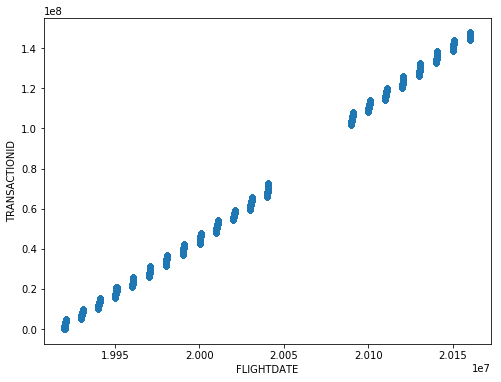

In [38]:
df.plot.scatter(x='FLIGHTDATE', y='TRANSACTIONID', figsize=(8,6))

In [39]:
# Find missing flight years:

df['flightyear'] = df['FLIGHTDATE'].astype(str).str[0:4]
df['flightyear'].value_counts().sort_index()

# missing 2005-2008

1992    50943
1993    50772
1994    51646
1995    53722
1996    53380
1997    54437
1998    53807
1999    55045
2000    56500
2001    62023
2002    52655
2003    64544
2004    70543
2009    63601
2010    63627
2011    60099
2012    59790
2013    62759
2014    57629
2015    57276
2016    37007
Name: flightyear, dtype: int64

In [ ]:
df.drop(['flightyear'], axis=1)

In [ ]:
# AIRLINECODE:

# nulls: 0 
# unique values: 26
# dtype: object
# no obvious errant data

In [40]:
df['AIRLINECODE'].unique()

array(['WN', 'CO', 'DL', 'HP', 'AA', 'UA', 'NW', 'MQ', 'TW', 'US', 'OO',
       'EV', 'XE', 'OH', 'DH', 'FL', '9E', 'F9', 'YV', 'AS', 'B6', 'NK',
       'VX', 'TZ', 'HA', 'KH'], dtype=object)

In [ ]:
# AirlineName: 

# nulls: 0
# dtype: object
# unique Values: 26 (same as AIRLINECODE)
#
#
# Airline has been split into 2 columns:
    # First column has Airline Name without the Airline Code
    # Second column keeps the airline merger history as a separate column called AIRLINE_HISTORY


In [41]:
df['AIRLINENAME'].unique()

array(['Southwest Airlines Co.: WN', 'Continental Air Lines Inc.: CO',
       'Delta Air Lines Inc.: DL',
       'America West Airlines Inc.: HP (Merged with US Airways 9/05.Stopped reporting 10/07.)',
       'American Airlines Inc.: AA', 'United Air Lines Inc.: UA',
       'Northwest Airlines Inc.: NW', 'Envoy Air: MQ',
       'Trans World Airways LLC: TW',
       'US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)',
       'SkyWest Airlines Inc.: OO', 'ExpressJet Airlines Inc.: EV',
       'ExpressJet Airlines Inc. (1): XE', 'Comair Inc.: OH (1)',
       'Independence Air: DH', 'AirTran Airways Corporation: FL',
       'Endeavor Air Inc.: 9E', 'Frontier Airlines Inc.: F9',
       'Mesa Airlines Inc.: YV', 'Alaska Airlines Inc.: AS',
       'JetBlue Airways: B6', 'Spirit Air Lines: NK', 'Virgin America: VX',
       'ATA Airlines d/b/a ATA: TZ', 'Hawaiian Airlines Inc.: HA',
       'Aloha Airlines Inc.: AQ'], dtype=object)

In [49]:
# Split col at ":"

new_df = df["AIRLINENAME"].str.split(":", n=1, expand=True)
new_df.head()

,0,1
0,Southwest Airlines Co.,WN
1,Continental Air Lines Inc.,CO
2,Southwest Airlines Co.,WN
3,Southwest Airlines Co.,WN
4,Continental Air Lines Inc.,CO


In [50]:
# Redefine split columns

df["airlineName1"] = new_df[0]
df["airlineName2"] = new_df[1]
df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,airlineName1,airlineName2
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,DallasTX: Dallas Love Field,Dallas,TX,Texas,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles,Southwest Airlines Co.,WN
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles,Continental Air Lines Inc.,CO
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas CityMO: Kansas City International,Kansas City,MO,Missouri,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles,Southwest Airlines Co.,WN
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,Las VegasNV: McCarran International,Las Vegas,NV,Nevada,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles,Southwest Airlines Co.,WN
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles,Continental Air Lines Inc.,CO


In [51]:
df["airlineName2"].unique()

array([' WN', ' CO', ' DL',
       ' HP (Merged with US Airways 9/05.Stopped reporting 10/07.)', ' AA',
       ' UA', ' NW', ' MQ', ' TW',
       ' US (Merged with America West 9/05. Reporting for both starting 10/07.)',
       ' OO', ' EV', ' XE', ' OH (1)', ' DH', ' FL', ' 9E', ' F9', ' YV',
       ' AS', ' B6', ' NK', ' VX', ' TZ', ' HA', ' AQ'], dtype=object)

In [52]:
# remove history from code

df['airlineName3'] = df['airlineName2'].astype(str).str[3:]
df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,airlineName1,airlineName2,airlineName3
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,DallasTX: Dallas Love Field,Dallas,TX,Texas,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles,Southwest Airlines Co.,WN,
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles,Continental Air Lines Inc.,CO,
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas CityMO: Kansas City International,Kansas City,MO,Missouri,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles,Southwest Airlines Co.,WN,
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,Las VegasNV: McCarran International,Las Vegas,NV,Nevada,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles,Southwest Airlines Co.,WN,
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles,Continental Air Lines Inc.,CO,


In [53]:
df = df.drop('airlineName2', axis=1)

In [54]:
df = df.drop('AIRLINENAME', axis=1)

In [55]:
df = df.rename(columns = {"airlineName1": "AIRLINENAME"})

In [56]:
df = df.rename(columns = {"airlineName3": "AIRLINE_HISTORY"})

In [ ]:
df.to_csv("flights_data_airlinename_fix.csv")

In [4]:
# Read New Data File

df = pd.read_csv('flights_data_airlinename_fix.csv')
#df.head()

In [5]:
data = df.drop('Unnamed: 0', axis=1)

In [ ]:
# TAILNUM

# Nulls: 156817 (13.2%)
# Type: Object
# "-" negative values have been changed instead of dropped
# "nkno" and "unknow" values are all under "unknow"
    # new total of "unknow": 11859
    # these were not changed to "null" to designate a possible pipeline fix
# Values that start with "'" have been changed instead of dropped

In [ ]:
data['TAILNUM'].value_counts()

In [6]:
data['TAILNUM'].nunique()

13869

In [ ]:
data['TAILNUM'].value_counts().sort_index()

In [6]:
# Remove "-" in front of names where it exists

# convert NA to 0 for analysis
print('nulls: ', data['TAILNUM'].isnull().sum())
tailNotNull = data['TAILNUM'].fillna(0)
print('new nulls: ', tailNotNull.isnull().sum())


nulls:  156817
new nulls:  0


In [19]:
tailNotNull.head()

0    N103@@
1    N83872
2    N334@@
3    N699@@
4    N58606
Name: TAILNUM, dtype: object

In [7]:
# find values with '-' & convert nulls to 0
data["neg"] = tailNotNull.str.contains("-")
data["neg"] = data["neg"].fillna(0)
data["neg"].isnull().sum()

0

In [9]:
# Create new dataframe with just two cols
data2 = data[['TAILNUM', 'neg']] 
data2.head()

,TAILNUM,neg
0,N103@@,False
1,N83872,False
2,N334@@,False
3,N699@@,False
4,N58606,False


In [10]:
# filter DF where TAILNUM has "-"
data3 = np.where(data2['neg'] == True)

In [15]:
# get index values where neg = true

data4 = data2.iloc[data3]
data4

,TAILNUM,neg
485,-N948,True
1587,-N201M,True
1588,-N604M,True
1589,-N382M,True
1590,-N397M,True
1591,-N902M,True
1592,-N620M,True
1593,-N375M,True
1594,-N323M,True
4915,-N903M,True


In [16]:
data4.head()

,TAILNUM,neg
485,-N948,True
1587,-N201M,True
1588,-N604M,True
1589,-N382M,True
1590,-N397M,True


In [17]:
data4['TAILNUM'] = data4['TAILNUM'].astype(str).str[1:]
data4.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TAILNUM,neg
485,N948,True
1587,N201M,True
1588,N604M,True
1589,N382M,True
1590,N397M,True


In [18]:
data4.shape

(13076, 2)

In [27]:
# make new DF for test

dataF = data

In [28]:
dataF.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'TAILNUM', 'FLIGHTNUM',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY',
       'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME',
       'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY', 'neg'],
      dtype='object')

In [29]:
dataF.update(data4)

In [32]:
# Test succeeded

dataF['TAILNUM'].value_counts().sort_index()

'144DA       2
112         67
21139E      23
21199E      19
314          2
7819A       10
7820L        5
80009E      32
80019E      37
80059E      48
80129E      30
80139E      32
80199E      33
80209E      26
80219E      40
80239E      30
80249E      31
80259E      23
80269E      44
80279E      39
80299E      32
80309E      34
80399E      37
80419E      47
83909E      31
84099E      37
84129E      41
84169E      39
84239E      46
84329E      26
          ... 
NR36A1      22
NR36AA      36
NR51AA       8
NR52A1      10
NR52AA      32
NR53A1      14
NR53AA      29
NR54A1      20
NR54AA      29
NR55A1      15
NR55AA      23
NR71A1       6
NR71AA      36
NR72AA      12
NR78A1       1
NR78AA      26
NR79A1       3
NR79AA      22
NR80A1       6
NR80AA      27
NR81A1      16
NR81AA      30
NR82A1       9
NR82AA      17
UNKNOW    7640
n408ca      25
n409ca      25
n466ca      19
n815ca      24
n816ca      24
Name: TAILNUM, Length: 13821, dtype: int64

In [35]:
# Drop Bool col

dataF = dataF.drop('neg', axis=1)

In [36]:
dataF.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'TAILNUM', 'FLIGHTNUM',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY',
       'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME',
       'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY'],
      dtype='object')

In [37]:
# Save new Data

dataF.to_csv("flights_tail_fix.csv")

In [43]:
# reset data
data = pd.read_csv("flights_tail_fix.csv")

In [61]:
data['TAILNUM'].value_counts()

UNKNOW    7640
NKNO      4255
N905DE     363
N902DE     353
N484HA     350
N954DL     345
N485HA     343
N937DL     341
N932DL     341
N977DL     340
N912DL     340
N906DE     335
N477HA     333
N524       332
N102       331
N765AS     331
N951DL     330
N976DL     329
N486HA     329
N957DL     327
N919DE     327
N973DL     326
N962DL     326
N916DE     324
N912DE     324
N354       324
N949DL     322
N481HA     322
N514       321
N980DL     321
          ... 
N804AA       1
N1731        1
N7BRA1       1
N2201        1
N366A1       1
N27958       1
N291AY       1
N243NW       1
N7BPA1       1
N356A1       1
N7911        1
N504AS       1
N1091        1
N8688J       1
N17789       1
N8APAA       1
N493AS       1
N227N        1
N1608@       1
N613US       1
NR78A1       1
N7BDA1       1
N1881        1
N242N        1
N256PS       1
N335MQ       1
N484         1
N82AMQ       1
N171HQ       1
N074A1       1
Name: TAILNUM, Length: 13821, dtype: int64

In [63]:
# Fix '144DA vals and nkno vals

for index, row in data.iterrows():
    if row['TAILNUM'] == "'144DA":
        data.at[index, 'TAILNUM'] = "144DA"
    elif row['TAILNUM'] == 'NKNO':
        data.at[index, 'TAILNUM'] = "UNKNOW"

In [64]:
data['TAILNUM'].value_counts().sort_index()

112          67
144DA         2
21139E       23
21199E       19
314           2
7819A        10
7820L         5
80009E       32
80019E       37
80059E       48
80129E       30
80139E       32
80199E       33
80209E       26
80219E       40
80239E       30
80249E       31
80259E       23
80269E       44
80279E       39
80299E       32
80309E       34
80399E       37
80419E       47
83909E       31
84099E       37
84129E       41
84169E       39
84239E       46
84329E       26
          ...  
NR36A1       22
NR36AA       36
NR51AA        8
NR52A1       10
NR52AA       32
NR53A1       14
NR53AA       29
NR54A1       20
NR54AA       29
NR55A1       15
NR55AA       23
NR71A1        6
NR71AA       36
NR72AA       12
NR78A1        1
NR78AA       26
NR79A1        3
NR79AA       22
NR80A1        6
NR80AA       27
NR81A1       16
NR81AA       30
NR82A1        9
NR82AA       17
UNKNOW    11895
n408ca       25
n409ca       25
n466ca       19
n815ca       24
n816ca       24
Name: TAILNUM, Length: 1

In [67]:
data.to_csv("flights_tail_fix.csv", index=False)

In [3]:
data = pd.read_csv("flights_tail_fix.csv")
data.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'TAILNUM', 'FLIGHTNUM',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY',
       'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME',
       'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY'],
      dtype='object')

In [ ]:
# FLIGHTNUM

# 0 nulls
# type: int
# min: 1
# max: 9899
# unique: 8034

In [ ]:
# ORIGINAIRPORTCODE

# nulls: 0
# Type: object
# unique: 363

In [11]:
data['ORIGINAIRPORTCODE'].isnull().sum()

0

In [14]:
data['ORIGINAIRPORTCODE'].nunique()

363

In [11]:
data['ORIGINAIRPORTCODE'].unique()

array(['ABQ', 'ABY', 'ALB', 'ABI', 'CAK', 'ATL', 'BHM', 'BIL', 'BGM',
       'RDM', 'BET', 'BTR', 'BPT', 'BLI', 'BJI', 'BRW', 'BGR', 'BWI',
       'AUS', 'MDW', 'ORD', 'AMA', 'ACV', 'AGS', 'ACY', 'ANC', 'ATW',
       'ANI', 'AVL', 'APN', 'ABE', 'BFL', 'ASE', 'HTS', 'CLT', 'CRW',
       'CPR', 'CDC', 'CHS', 'CID', 'CMI', 'CLD', 'BTM', 'BTV', 'BUR',
       'BQN', 'ADK', 'ABR', 'AEX', 'TRI', 'BRO', 'BUF', 'BQK', 'BZN',
       'BRD', 'BKG', 'BOS', 'BIS', 'BOI', 'DFW', 'TYS', 'EYW', 'ILE',
       'MCI', 'LMT', 'GRK', 'AKN', 'ISO', 'KTN', 'ADQ', 'LAS', 'LRD',
       'LAN', 'LAR', 'LCH', 'LNY', 'LFT', 'LSE', 'KOA', 'OTZ', 'ROR',
       'LIH', 'LEX', 'LWS', 'LAW', 'LWB', 'LBE', 'LIT', 'LNK', 'LGB',
       'LAX', 'GGG', 'FCA', 'IAH', 'HOU', 'OGG', 'AZO', 'JNU', 'JAX',
       'JMS', 'JLN', 'OAJ', 'HSV', 'ISP', 'JAN', 'JAC', 'IND', 'ITH',
       'IYK', 'IMT', 'INL', 'IDA', 'HYA', 'EFD', 'SDF', 'MHT', 'MSN',
       'MMH', 'LBB', 'LYH', 'MCN', 'MFR', 'MQT', 'MVY', 'MAZ', 'RSW',
       'MHK', 'MEM',

In [ ]:
# ORIGAIRPORTNAME

# nulls: 0
# unique: 363 (same as airportcode)
# type: object
# city & state removed from name

In [19]:
print('nulls: ', data['ORIGAIRPORTNAME'].isnull().sum())
print('unique: ', data['ORIGAIRPORTNAME'].nunique())

nulls:  0
unique:  363


In [21]:
data['ORIGAIRPORTNAME'].unique()

array(['AlbuquerqueNM: Albuquerque International Sunport',
       'AlbanyGA: Southwest Georgia Regional',
       'AlbanyNY: Albany International', 'AbileneTX: Abilene Regional',
       'AkronOH: Akron-Canton Regional',
       'AtlantaGA: Hartsfield-Jackson Atlanta International',
       'BirminghamAL: Birmingham-Shuttlesworth International',
       'BillingsMT: Billings Logan International',
       'BinghamtonNY: Greater Binghamton/Edwin A. Link Field',
       'Bend/RedmondOR: Roberts Field', 'BethelAK: Bethel Airport',
       'Baton RougeLA: Baton Rouge Metropolitan/Ryan Field',
       'Beaumont/Port ArthurTX: Jack Brooks Regional',
       'BellinghamWA: Bellingham International',
       'BemidjiMN: Bemidji Regional',
       'BarrowAK: Wiley Post/Will Rogers Memorial',
       'BangorME: Bangor International',
       'BaltimoreMD: Baltimore/Washington International Thurgood Marshall',
       'AustinTX: Austin - Bergstrom International',
       'ChicagoIL: Chicago Midway International',

In [22]:
new_df = data["ORIGAIRPORTNAME"].str.split(":", n=1, expand=True)
new_df.head()

,0,1
0,AlbuquerqueNM,Albuquerque International Sunport
1,AlbuquerqueNM,Albuquerque International Sunport
2,AlbuquerqueNM,Albuquerque International Sunport
3,AlbuquerqueNM,Albuquerque International Sunport
4,AlbuquerqueNM,Albuquerque International Sunport


In [23]:
data["ORIGAIRPORTNAME"] = new_df[1]
data.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,...,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY
0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles,Southwest Airlines Co.,NaN
1,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1426,1435.0,9.0,116.0,119.0,False,F,744 miles,Continental Air Lines Inc.,NaN
2,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1500,1620.0,80.0,105.0,102.0,F,False,718 miles,Southwest Airlines Co.,NaN
3,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles,Southwest Airlines Co.,NaN
4,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles,Continental Air Lines Inc.,NaN


In [25]:
data.to_csv("flights_origname_fix.csv", index=False)

In [37]:
data = pd.read_csv("flights_origname_fix.csv")
data.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'TAILNUM', 'FLIGHTNUM',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY',
       'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME',
       'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY'],
      dtype='object')

In [ ]:
# ORIGINCITYNAME

# nulls: 0
# unique: 344
# type: Object

In [5]:
print('nulls: ', data['ORIGINCITYNAME'].isnull().sum())
print('unique: ', data['ORIGINCITYNAME'].nunique())

nulls:  0
unique:  344


In [6]:
data['ORIGINCITYNAME'].unique()

array(['Albuquerque', 'Albany', 'Abilene', 'Akron', 'Atlanta',
       'Birmingham', 'Billings', 'Binghamton', 'Bend/Redmond', 'Bethel',
       'Baton Rouge', 'Beaumont/Port Arthur', 'Bellingham', 'Bemidji',
       'Barrow', 'Bangor', 'Baltimore', 'Austin', 'Chicago', 'Amarillo',
       'Arcata/Eureka', 'Augusta', 'Atlantic City', 'Anchorage',
       'Appleton', 'Aniak', 'Asheville', 'Alpena',
       'Allentown/Bethlehem/Easton', 'Bakersfield', 'Aspen', 'Ashland',
       'Charlotte', 'Charleston/Dunbar', 'Casper', 'Cedar City',
       'Charleston', 'Cedar Rapids/Iowa City', 'Champaign/Urbana',
       'Carlsbad', 'Butte', 'Burlington', 'Burbank', 'Aguadilla',
       'Adak Island', 'Aberdeen', 'Alexandria',
       'Bristol/Johnson City/Kingsport', 'Brownsville', 'Buffalo',
       'Brunswick', 'Bozeman', 'Brainerd', 'Branson', 'Boston',
       'Bismarck/Mandan', 'Boise', 'Dallas/Fort Worth', 'Knoxville',
       'Key West', 'Killeen', 'Kansas City', 'Klamath Falls',
       'King Salmon', 'K

In [ ]:
# ORIGINSTATE

# nulls: 10842
    # new nulls: 0
# type: object
# unique: 51

In [9]:
print('nulls: ', data['ORIGINSTATE'].isnull().sum())
print('unique: ', data['ORIGINSTATE'].nunique())
print(data['ORIGINSTATE'].unique())

nulls:  10842
unique:  51
['NM' 'GA' 'NY' 'TX' 'OH' 'AL' 'MT' 'OR' 'AK' 'LA' 'WA' 'MN' 'ME' 'MD' 'IL'
 'CA' 'NJ' 'WI' 'NC' 'MI' 'PA' 'CO' 'WV' 'WY' 'UT' 'SC' 'IA' 'VT' 'PR' 'SD'
 'TN' 'MO' 'MA' 'ND' 'ID' 'FL' 'NV' 'HI' 'TT' 'KY' nan 'AR' 'NE' 'MS' 'IN'
 'NH' 'VA' 'CT' 'AZ' 'DE' 'RI' 'VI']


In [10]:
print('nulls: ', data['ORIGINSTATENAME'].isnull().sum())
print('unique: ', data['ORIGINSTATENAME'].nunique())
print(data['ORIGINSTATENAME'].unique())

nulls:  10842
unique:  51
['New Mexico' 'Georgia' 'New York' 'Texas' 'Ohio' 'Alabama' 'Montana'
 'Oregon' 'Alaska' 'Louisiana' 'Washington' 'Minnesota' 'Maine' 'Maryland'
 'Illinois' 'California' 'New Jersey' 'Wisconsin' 'North Carolina'
 'Michigan' 'Pennsylvania' 'Colorado' 'West Virginia' 'Wyoming' 'Utah'
 'South Carolina' 'Iowa' 'Vermont' 'Puerto Rico' 'South Dakota' 'Tennessee'
 'Missouri' 'Massachusetts' 'North Dakota' 'Idaho' 'Florida' 'Nevada'
 'Hawaii' 'U.S. Pacific Trust Territories and Possessions' 'Kentucky' nan
 'Arkansas' 'Nebraska' 'Mississippi' 'Indiana' 'New Hampshire' 'Virginia'
 'Connecticut' 'Arizona' 'Delaware' 'Rhode Island' 'U.S. Virgin Islands']


In [3]:
# read in iata codes by state data set
codes = pd.read_csv("state_iata.csv")
codes.columns

Index(['state', 'code'], dtype='object')

In [15]:
codes.shape

(722, 2)

In [4]:
data['statenull'] = data['ORIGINSTATE'].isnull()

In [20]:
data.statenull.value_counts()

False    1180963
True       10842
Name: statenull, dtype: int64

In [22]:
data.head(100)

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,...,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY,statenull
0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1652.0,-3.0,90.0,87.0,F,False,580 miles,Southwest Airlines Co.,NaN,False
1,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1435.0,9.0,116.0,119.0,False,F,744 miles,Continental Air Lines Inc.,NaN,False
2,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1620.0,80.0,105.0,102.0,F,False,718 miles,Southwest Airlines Co.,NaN,False
3,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1948.0,-2.0,85.0,83.0,0,0,487 miles,Southwest Airlines Co.,NaN,False
4,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1747.0,-3.0,115.0,114.0,F,False,744 miles,Continental Air Lines Inc.,NaN,False
5,54380600,20020103,WN,N501@@,193,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1826.0,21.0,55.0,49.0,False,F,289 miles,Southwest Airlines Co.,NaN,False
6,55117600,20020104,DL,N37574,262,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,2055.0,168.0,97.0,98.0,False,False,569 miles,Delta Air Lines Inc.,NaN,False
7,55232700,20020105,DL,N517D1,1214,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,2003.0,111.0,157.0,163.0,F,False,1240 miles,Delta Air Lines Inc.,NaN,False
8,54624700,20020105,WN,N679@@,2122,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1930.0,50.0,50.0,40.0,False,F,223 miles,Southwest Airlines Co.,NaN,False
9,54613800,20020105,WN,N791@@,2038,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,...,1115.0,25.0,125.0,115.0,F,False,677 miles,Southwest Airlines Co.,NaN,False


In [5]:
data2 = data[['ORIGINSTATE', 'ORIGINAIRPORTCODE', 'statenull']]
data3 = np.where(data2['statenull'] == True)
data3

(array([  96226,   96227,   96228, ..., 1128397, 1128398, 1128399], dtype=int64),)

In [6]:
data4 = data2.iloc[data3]
print(data4.head())

      ORIGINSTATE ORIGINAIRPORTCODE  statenull
96226         NaN               LAW       True
96227         NaN               LAW       True
96228         NaN               LAW       True
96229         NaN               LAW       True
96230         NaN               LAW       True


In [8]:
df_left = pd.merge(data4, codes, on='ORIGINAIRPORTCODE', how='left')


In [9]:
df_left = df_left.rename(columns = {"ORIGINSTATE_y":"ORIGINSTATE"})
df_left.head()

,ORIGINSTATE_x,ORIGINAIRPORTCODE,statenull,ORIGINSTATE
0,NaN,LAW,True,OK
1,NaN,LAW,True,OK
2,NaN,LAW,True,OK
3,NaN,LAW,True,OK
4,NaN,LAW,True,OK


In [10]:
df_left = df_left.drop('ORIGINSTATE_x', axis=1)

In [13]:
# Memory issues on merge

dataF = pd.merge(data, df_left, on='statenull', how='left')
dataF.head()

MemoryError: 

In [14]:
datatemp = data[['ORIGINAIRPORTCODE', 'statenull', 'ORIGINSTATE']]
datatemp.head()

,ORIGINAIRPORTCODE,statenull,ORIGINSTATE
0,ABQ,False,NM
1,ABQ,False,NM
2,ABQ,False,NM
3,ABQ,False,NM
4,ABQ,False,NM


In [27]:
datatemp = pd.merge(datatemp, df_left, on='statenull', how='left')

MemoryError: 

In [21]:
dataFF = datatemp.update(df_left)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3863: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raise_on_error=True)


In [25]:
datatemp.shape

(1191805, 3)

In [31]:
df_left['ORIGINSTATE'].value_counts()

 OK     8825
 KS     2014
 KS        3
Name: ORIGINSTATE, dtype: int64

In [33]:
data.isnull().sum()

TRANSACTIONID              0
FLIGHTDATE                 0
AIRLINECODE                0
TAILNUM               156817
FLIGHTNUM                  0
ORIGINAIRPORTCODE          0
ORIGAIRPORTNAME            0
ORIGINCITYNAME             0
ORIGINSTATE            10842
ORIGINSTATENAME        10842
DESTAIRPORTCODE            0
DESTAIRPORTNAME            0
DESTCITYNAME               0
DESTSTATE              10838
DESTSTATENAME          10838
CRSDEPTIME                 0
DEPTIME                28335
DEPDELAY               28335
TAXIOUT               179972
WHEELSOFF             180014
WHEELSON              181580
TAXIIN                181485
CRSARRTIME                 0
ARRTIME                30366
ARRDELAY               31260
CRSELAPSEDTIME           422
ACTUALELAPSEDTIME      31260
CANCELLED                  0
DIVERTED                   0
DISTANCE                   0
AIRLINENAME                0
AIRLINE_HISTORY      1040961
statenull                  0
dtype: int64

In [41]:
for index, row in data.iterrows():
    if row['ORIGINAIRPORTCODE'] in ("LAW","OKC","TUL")
        data.at[index, 'ORIGINSTATE'] = "OK"
    elif row['ORIGINAIRPORTCODE'] in ("FOE","MCI")
        data.at[index, 'ORIGINSTATE'] = "KS"
    else:
        pass


In [57]:
data['ORIGINSTATE'].isnull().sum()

0

In [ ]:
# ORIGINSTATENAME

# dtype: object
# nulls: 10842
    # new nulls: 0
# distinct vals: 51 (same as state code)

In [48]:
data['ORIGINSTATENAME'].value_counts()

California                                        141852
Texas                                             137592
Illinois                                           78413
Florida                                            78338
Georgia                                            67182
New York                                           51653
Pennsylvania                                       39624
Colorado                                           39422
North Carolina                                     39249
Arizona                                            39024
Virginia                                           37271
Missouri                                           35668
Michigan                                           33342
Nevada                                             31670
Minnesota                                          27582
New Jersey                                         24711
Tennessee                                          23971
Washington                     

In [51]:
data['ORIGINSTATENAME'].nunique()

51

In [63]:
statenulls = np.where(data['ORIGINSTATE'].isnull())
statenulls

(array([163152, 163153, 163154, 163155, 163156, 163157, 163158, 163159,
        163160, 163161, 163162, 163163, 163164, 163165, 163166, 163167,
        163221, 163222, 163223, 163224, 163225, 163226, 163227, 163228,
        163229, 163230, 163231, 163232, 163233, 163234, 163235, 163236,
        163237, 163238, 163239, 163240, 163241, 163242, 163243, 163244,
        163245, 163246, 163247, 163248, 163249, 163250, 163251, 163252,
        163253, 163254, 163255, 163256, 163257, 163258, 799273, 799274,
        799275, 799276, 799277, 799278, 799279, 799280, 799281, 799282,
        799283, 799284, 799285, 799286, 799287, 799288, 799289, 799290,
        799291, 799292, 799293, 799294, 799295, 799296, 799297, 799298,
        799299, 799300, 799301, 799302, 799303, 799304, 799305, 799466,
        799467, 799468, 799469, 799470, 799471, 799472, 799473, 799474,
        799475, 799476, 799477], dtype=int64),)

In [64]:
data.iloc[statenulls]

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,...,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY
163152,106819500,20090906,MQ,N931MQ,3844,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,1720,1709.0,-11.0,95.0,89.0,F,False,431 miles,Envoy Air,NaN
163153,106817700,20090913,MQ,N680MQ,3816,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,905,854.0,-11.0,95.0,87.0,False,F,431 miles,Envoy Air,NaN
163154,109446200,20100109,MQ,N620MQ,2844,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,1720,1716.0,-4.0,95.0,84.0,F,False,431 miles,Envoy Air,NaN
163155,111046800,20100501,MQ,N849MQ,2844,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,1730,1722.0,-8.0,90.0,91.0,False,F,431 miles,Envoy Air,NaN
163156,111037800,20100511,MQ,N809MQ,2732,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,1335,1343.0,8.0,90.0,86.0,0,0,431 miles,Envoy Air,NaN
163157,111044900,20100521,MQ,N801MQ,2816,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,900,857.0,-3.0,90.0,90.0,False,F,431 miles,Envoy Air,NaN
163158,111046900,20100526,MQ,N800MQ,2844,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,1730,1836.0,66.0,90.0,95.0,False,F,431 miles,Envoy Air,NaN
163159,113177900,20100919,MQ,N801MQ,2732,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,1335,1324.0,-11.0,90.0,80.0,0,0,431 miles,Envoy Air,NaN
163160,116213700,20110114,MQ,N603MQ,2816,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,920,908.0,-12.0,100.0,95.0,False,F,431 miles,Envoy Air,NaN
163161,116298200,20110119,MQ,N680MQ,4031,MHK,Manhattan Regional,Manhattan/Ft. Riley,NaN,NaN,...,845,819.0,-26.0,115.0,99.0,False,F,501 miles,Envoy Air,NaN


In [70]:
data.to_csv("flights_state_fix.csv", index=False)

In [ ]:
for index, row in data.iterrows():
    if row['ORIGINSTATE'] == "KS":
        data.at[index, 'ORIGINSTATENAME'] = "Kansas"

In [59]:
data['ORIGINSTATENAME'].isnull().sum()

0

In [ ]:
# DESTAIRPORTCODE

# nulls: 0
# type: object
# distinct vals: 364

In [3]:
data = pd.read_csv("flights_state_fix.csv")

In [78]:
data['DESTAIRPORTCODE'].unique()

array(['DAL', 'IAH', 'MCI', 'LAS', 'LBB', 'DFW', 'CVG', 'ELP', 'LAX',
       'PHX', 'SAN', 'MDW', 'AMA', 'MAF', 'STL', 'OAK', 'DEN', 'TUS',
       'MCO', 'MSP', 'SEA', 'HOU', 'ATL', 'BWI', 'EWR', 'TPA', 'ORD',
       'SLC', 'COS', 'SFO', 'PDX', 'PIT', 'CLE', 'IAD', 'DCA', 'JFK',
       'DTW', 'CLT', 'LGA', 'PHL', 'MKE', 'RDU', 'PWM', 'BUF', 'BOS',
       'RSW', 'TRI', 'CHS', 'STT', 'GSO', 'JAX', 'OKC', 'SAT', 'SJU',
       'VPS', 'CID', 'DAY', 'DSM', 'IND', 'MEM', 'MOB', 'BNA', 'PHF',
       'SGF', 'TLH', 'CSG', 'GRK', 'LFT', 'MYR', 'MSY', 'SAV', 'HPN',
       'HSV', 'RIC', 'SHV', 'CAK', 'ALB', 'AUS', 'BHM', 'CHA', 'GTR',
       'FLL', 'GRR', 'TYS', 'LIT', 'MLU', 'BQK', 'CMH', 'FAY', 'EYW',
       'MIA', 'ORF', 'ECP', 'ROA', 'PBI', 'AGS', 'CHO', 'DHN', 'GNV',
       'GSP', 'SRQ', 'ILM', 'ABQ', 'BTR', 'BDL', 'MSN', 'PNS', 'ROC',
       'CRW', 'CAE', 'GPT', 'EWN', 'SNA', 'LEX', 'MGM', 'TUL', 'ICT',
       'ATW', 'EVV', 'SBN', 'DAB', 'FNT', 'MLB', 'ABY', 'VLD', 'PIA',
       'XNA', 'FWA',

In [ ]:
# DESTAIRPORTNAME

# nulls: 0
    # new nulls: 0
# type: object
# distinct vals: 364

In [84]:
data['DESTAIRPORTNAME'].nunique()

364

In [4]:
new_df = data["DESTAIRPORTNAME"].str.split(":", n=1, expand=True)
new_df.head()

,0,1
0,DallasTX,Dallas Love Field
1,HoustonTX,George Bush Intercontinental/Houston
2,Kansas CityMO,Kansas City International
3,Las VegasNV,McCarran International
4,HoustonTX,George Bush Intercontinental/Houston


In [5]:
data['DESTAIRPORTNAME'] = new_df[1]


In [6]:
print(data[['TRANSACTIONID', 'DESTAIRPORTNAME', 'DESTAIRPORTCODE']])

         TRANSACTIONID                                    DESTAIRPORTNAME  \
0             54548800                                  Dallas Love Field   
1             55872300               George Bush Intercontinental/Houston   
2             54388800                          Kansas City International   
3             54486500                             McCarran International   
4             55878700               George Bush Intercontinental/Houston   
5             54380600                Lubbock Preston Smith International   
6             55117600                    Dallas/Fort Worth International   
7             55232700         Cincinnati/Northern Kentucky International   
8             54624700                              El Paso International   
9             54613800                          Los Angeles International   
10            54583300                   Phoenix Sky Harbor International   
11            54428000                                  Dallas Love Field   

In [7]:
data.to_csv("flights_dest_fix.csv", index=False)

In [ ]:
# DESTSTATE

# nulls: 10838
    # new nulls: 0
# type: obj
# distinct vals: 51

In [70]:
data = pd.read_csv("flights_dest_fix.csv")

In [29]:
data['DESTSTATE'].unique()

array(['TX', 'MO', 'NV', 'KY', 'CA', 'AZ', 'IL', 'CO', 'FL', 'MN', 'WA',
       'GA', 'MD', 'NJ', 'UT', 'OR', 'PA', 'OH', 'VA', 'NY', 'MI', 'NC',
       'WI', 'ME', 'MA', 'TN', 'SC', 'VI', nan, 'PR', 'IA', 'IN', 'AL',
       'LA', 'MS', 'AR', 'NM', 'CT', 'WV', 'NE', 'RI', 'NH', 'HI', 'MT',
       'AK', 'DE', 'SD', 'WY', 'VT', 'ND', 'ID', 'TT'], dtype=object)

In [21]:
data['DESTSTATE'] = data['DESTSTATE'].fillna("null")
data['DESTSTATE'].head()

0    TX
1    TX
2    MO
3    NV
4    TX
Name: DESTSTATE, dtype: object

In [22]:
destnulls = np.where(data.DESTSTATE == "null")
destnulls

(array([   2055,    2310,    2312, ..., 1191676, 1191691, 1191700], dtype=int64),)

In [23]:
new_data = data.iloc[destnulls]
new_data['DESTSTATE'].head()

2055    null
2310    null
2312    null
2327    null
2356    null
Name: DESTSTATE, dtype: object

In [15]:
new_data.shape

(10838, 32)

In [25]:
# Airport codes identified as having missing state

new_data['DESTAIRPORTCODE'].value_counts()

OKC    4470
TUL    4215
ICT    1847
LAW     156
MHK      99
GCK      33
HYS      13
FOE       5
Name: DESTAIRPORTCODE, dtype: int64

In [34]:
# Replace missing State Code

for index, row in data.iterrows():
    if row['DESTAIRPORTCODE'] in ("LAW","OKC","TUL"):
        data.at[index, 'DESTSTATE'] = "OK"
    elif row['DESTAIRPORTCODE'] in ("FOE", "ICT", "MHK", "GCK", "HYS"):
        data.at[index, 'DESTSTATE'] = "KS"
    else:
        pass

In [37]:
for index, row in data.iterrows():
    if row['DESTSTATE'] == "OK":
        data.at[index, 'DESTSTATENAME'] = "Oklahoma"
    if row['DESTSTATE'] == "KS":
        data.at[index, 'DESTSTATENAME'] = "Kansas"
    else:
        pass

In [61]:
print(data['DESTSTATE'].isnull().sum())
print(data['DESTSTATENAME'].isnull().sum())

0
0


In [51]:
data.to_csv("flights_state_fix.csv", index=False)

In [26]:
# analyze numeric data

In [91]:
# DISTANCE

# nulls: 0 
# type: object
    # new type: int

In [77]:
data = pd.read_csv("flights_z.csv")

In [80]:
data['DISTANCE'].value_counts()

337 miles     10113
370 miles      6851
236 miles      5726
328 miles      5721
224 miles      5509
334 miles      5321
733 miles      5315
325 miles      5247
304 miles      5059
296 miles      5005
256 miles      4977
223 miles      4811
448 miles      4719
214 miles      4700
719 miles      4597
237 miles      4566
258 miles      4566
612 miles      4495
862 miles      4455
239 miles      4450
802 miles      4404
109 miles      4348
399 miles      4269
528 miles      4237
590 miles      4083
550 miles      4053
185 miles      3994
247 miles      3958
1235 miles     3939
594 miles      3891
              ...  
2386 miles        2
1252 miles        2
2280 miles        2
1511 miles        2
4213 miles        2
1641 miles        2
27 miles          2
18 miles          1
1882 miles        1
2318 miles        1
1200 miles        1
2566 miles        1
1401 miles        1
1800 miles        1
2874 miles        1
2511 miles        1
2636 miles        1
2045 miles        1
953 miles         1


In [123]:
data['DISTANCE'].describe()

count    1.191805e+06
mean     7.336410e+02
std      5.647814e+02
min      1.100000e+01
25%      3.250000e+02
50%      5.810000e+02
75%      9.660000e+02
max      4.983000e+03
Name: DISTANCE, dtype: float64

In [100]:
data['DISTANCE'].value_counts().sort_index()

100 miles     1649
1005 miles    2270
1007 miles      65
1008 miles    1139
1009 miles    2698
101 miles      676
1010 miles     264
1011 miles    1029
1012 miles     977
1013 miles    1725
1014 miles     235
1015 miles      70
1016 miles      16
1017 miles     338
1019 miles     138
102 miles     1708
1020 miles    2332
1021 miles     958
1022 miles      17
1023 miles     450
1024 miles    2603
1025 miles     201
1026 miles      35
1027 miles     224
1028 miles     564
1029 miles      66
103 miles      293
1030 miles       4
1031 miles      25
1032 miles     127
              ... 
971 miles      138
972 miles     1123
973 miles       63
974 miles       13
975 miles       76
977 miles      676
978 miles     1548
979 miles      303
98 miles       949
980 miles     1046
981 miles      492
982 miles       23
983 miles      749
984 miles     1542
985 miles      474
986 miles      965
987 miles     1696
988 miles     1025
989 miles      764
99 miles        35
990 miles      351
991 miles   

In [82]:
new_dist = data["DISTANCE"].str.split(" ", n=1, expand=True)
new_dist.shape

(1191805, 2)

In [90]:
new_dist.head()

,0,1
0,580,miles
1,744,miles
2,718,miles
3,487,miles
4,744,miles


In [93]:
new_dist[0].str.isnumeric().value_counts()

True    1191805
Name: 0, dtype: int64

In [103]:
new_dist[0].value_counts().sort_index()

11        3
18        1
21       68
24       12
27        2
28       51
29        5
30       35
31      144
32       84
35        9
36      152
37       10
40       26
41        9
42       62
43        3
44        8
45      122
46       14
47      107
49      126
50        6
51        3
54        5
55       85
56      346
58       11
62       83
63       83
       ... 
3266     28
3302     17
3329     11
3353      4
3365     67
3379      1
3385      1
3386     21
3414     11
3417     10
3711     88
3784    369
3801     69
3826      8
3904    129
3972     61
4065     20
4130     78
4184     18
4213      2
4243     50
4244    209
4433      7
4475      3
4502    130
4678      9
4817     10
4962     87
4963     19
4983     29
Name: 0, Length: 1706, dtype: int64

In [102]:
# Convert to numeric

new_dist[0] = pd.to_numeric(new_dist[0], errors='ignore')

In [107]:
data['DISTANCE'] = new_dist[0]

In [108]:
data['DISTANCE'].max()

4983

In [110]:
data.to_csv("flights_dist.csv", index=False)

In [ ]:
# CANCELLED:

# 0 = False
# 1 = True
# nulls: 0
# data changed to just t or f


In [3]:
data = pd.read_csv("flights_dist.csv")

In [159]:
data['CANCELLED'].value_counts()

False    637289
0        347545
F        178357
True      16370
1          8160
T          4084
Name: CANCELLED, dtype: int64

In [4]:
for index, row in data.iterrows():
    if row['CANCELLED'] in ('0', 'False'):
        data.at[index, 'CANCELLED'] = 'F'
    elif row['CANCELLED'] in ('1', 'True'):
        data.at[index, 'CANCELLED'] = 'T'
    else:
        pass
    
data['CANCELLED'].value_counts()

F    1163191
T      28614
Name: CANCELLED, dtype: int64

In [ ]:
# DIVERTED

# nulls: 0 

In [122]:
data['DIVERTED'].value_counts()

F        426572
False    407681
0        354906
T           966
True        881
1           799
Name: DIVERTED, dtype: int64

In [5]:
for index, row in data.iterrows():
    if row['DIVERTED'] in ('0', 'False'):
        data.at[index, 'DIVERTED'] = 'F'
    elif row['DIVERTED'] in ('1', 'True'):
        data.at[index, 'DIVERTED'] = 'T'
    else:
        pass
    
data['DIVERTED'].value_counts()

F    1189159
T       2646
Name: DIVERTED, dtype: int64

In [164]:
data.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,False,580,Southwest Airlines Co.,NaN
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,False,718,Southwest Airlines Co.,NaN
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,F,0,487,Southwest Airlines Co.,NaN
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,False,744,Continental Air Lines Inc.,NaN


In [6]:
data.to_csv("flights_diverted_fix.csv", index=False)

In [62]:
data = pd.read_csv("flights_diverted_fix.csv")

In [9]:
data['DISTANCEGROUP'] = 0

for index, row in data.iterrows():
    if row['DISTANCE'] >= 1 | row['DISTANCE'] <= 100:
        data.at[index, 'DISTANCEGROUP'] = '1-100'
    elif row['DIVERTED'] in ('1', 'True'):
        data.at[index, 'DISTANCEGROUP'] = 'T'
    else:
        pass
    
data['DIVERTED'].value_counts()

In [ ]:
# Add DEPDELAYGT15 column and create data:

In [63]:
data['DEPDELAYGT15'] = 0

for index, row in data.iterrows():
    if row['DEPDELAY'] >= 15:
        data.at[index, 'DEPDELAYGT15'] = 1
    else:
        data.at[index, 'DEPDELAYGT15'] = 0

In [64]:
data['DEPDELAYGT15'].value_counts()

0    1053937
1     137868
Name: DEPDELAYGT15, dtype: int64

In [67]:
data.to_csv("flights_depdelay.csv", index=False)

In [68]:
data = pd.read_csv("flights_depdelay.csv")

In [ ]:
# NEXTDAYARR 

In [18]:
data[['FLIGHTDATE','ARRTIME', 'DEPTIME']].head()

,FLIGHTDATE,ARRTIME,DEPTIME
0,20020101,1652.0,1425.0
1,20020101,1435.0,1136.0
2,20020101,1620.0,1338.0
3,20020101,1948.0,1925.0
4,20020103,1747.0,1453.0


In [69]:
nda = np.where(data['DEPTIME'] > data['ARRTIME'])
nda_loc = data.iloc[nda]
nda_loc.shape

(26562, 33)

In [70]:
nda_loc['nextdaytrue'] = True
#nda_loc.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
nda_loc['nextdaytrue'].value_counts()

True    26562
Name: nextdaytrue, dtype: int64

In [72]:
data_nda = nda_loc['nextdaytrue']
dataF = pd.concat([data, data_nda], axis=1)

In [73]:
dataF.shape

(1191805, 34)

In [75]:
dataF.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY,DEPDELAYGT15,nextdaytrue,NEXTDAYARR
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,F,580,Southwest Airlines Co.,NaN,0,NaN,0.0
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,NaN,0.0
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,F,718,Southwest Airlines Co.,NaN,1,NaN,0.0
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,F,F,487,Southwest Airlines Co.,NaN,0,NaN,0.0
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,NaN,0.0


In [76]:
for index, row in dataF.iterrows():
    if row['nextdaytrue'] == True:
        dataF.at[index, 'NEXTDAYARR'] = 1
    else:
        dataF.at[index, 'NEXTDAYARR'] = 0
        

In [77]:
dataF['NEXTDAYARR'].value_counts()

0.0    1165243
1.0      26562
Name: NEXTDAYARR, dtype: int64

In [82]:
dataF.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY,DEPDELAYGT15,nextdaytrue,NEXTDAYARR
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,F,580,Southwest Airlines Co.,NaN,0,NaN,0.0
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,NaN,0.0
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,F,718,Southwest Airlines Co.,NaN,1,NaN,0.0
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,F,F,487,Southwest Airlines Co.,NaN,0,NaN,0.0
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,NaN,0.0


In [85]:
dataF.dtypes

CRSDEPTIME           float64
DEPTIME              float64
DEPDELAY             float64
TAXIOUT              float64
WHEELSOFF            float64
WHEELSON             float64
TAXIIN               float64
CRSARRTIME           float64
ARRTIME              float64
ARRDELAY             float64
CRSELAPSEDTIME       float64
ACTUALELAPSEDTIME    float64
TRANSACTIONID          int64
FLIGHTDATE             int64
AIRLINECODE           object
TAILNUM               object
FLIGHTNUM              int64
ORIGINAIRPORTCODE     object
ORIGAIRPORTNAME       object
ORIGINCITYNAME        object
ORIGINSTATE           object
ORIGINSTATENAME       object
DESTAIRPORTCODE       object
DESTAIRPORTNAME       object
DESTCITYNAME          object
DESTSTATE             object
DESTSTATENAME         object
CANCELLED             object
DIVERTED              object
DISTANCE               int64
AIRLINENAME           object
AIRLINE_HISTORY       object
DEPDELAYGT15           int64
nextdaytrue           object
NEXTDAYARR    

In [86]:
dataF['NEXTDAYARR'].astype(int64).dtypes

NameError: name 'int64' is not defined

In [88]:
dataF.drop('nextdaytrue', axis=1)

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY,DEPDELAYGT15,NEXTDAYARR
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,F,580,Southwest Airlines Co.,NaN,0,0.0
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,0.0
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,F,718,Southwest Airlines Co.,NaN,1,0.0
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,F,F,487,Southwest Airlines Co.,NaN,0,0.0
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,0.0
5,1610.0,1637.0,27.0,5.0,1642.0,1822.0,4.0,1805.0,1826.0,21.0,55.0,49.0,54380600,20020103,WN,N501@@,193,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LBB,Lubbock Preston Smith International,Lubbock,TX,Texas,F,F,289,Southwest Airlines Co.,NaN,1,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55117600,20020104,DL,N37574,262,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DFW,Dallas/Fort Worth International,Dallas/Fort Worth,TX,Texas,F,F,569,Delta Air Lines Inc.,NaN,0,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55232700,20020105,DL,N517D1,1214,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,CVG,Cincinnati/Northern Kentucky International,Cincinnati,KY,Kentucky,F,F,1240,Delta Air Lines Inc.,NaN,0,0.0
8,1750.0,1850.0,60.0,5.0,1855.0,1925.0,5.0,1840.0,1930.0,50.0,50.0,40.0,54624700,20020105,WN,N679@@,2122,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,ELP,El Paso International,El Paso,TX,Texas,F,F,223,Southwest Airlines Co.,NaN,1,0.0
9,945.0,1020.0,35.0,8.0,1028.0,1108.0,7.0,1050.0,1115.0,25.0,125.0,115.0,54613800,20020105,WN,N791@@,2038,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAX,Los Angeles International,Los Angeles,CA,California,F,F,677,Southwest Airlines Co.,NaN,1,0.0


In [89]:
dataF['NEXTDAYARR'].value_counts()

0.0    1165243
1.0      26562
Name: NEXTDAYARR, dtype: int64

In [90]:
dataF.to_csv("flights_nda", index=False)

In [ ]:
# DISTANCEGROUP 

# Create new column for binning

In [9]:
data = pd.read_csv("flights_nda.csv")

In [16]:
data.columns

Index(['CRSDEPTIME', 'DEPTIME', 'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON',
       'TAXIIN', 'CRSARRTIME', 'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE',
       'TAILNUM', 'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME',
       'ORIGINCITYNAME', 'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE',
       'DESTAIRPORTNAME', 'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME',
       'CANCELLED', 'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY',
       'DEPDELAYGT15', 'NEXTDAYARR'],
      dtype='object')

In [15]:
data = data.drop('nextdaytrue', axis=1)

In [18]:
data.isnull().sum()

CRSDEPTIME            205964
DEPTIME               205964
DEPDELAY              205964
TAXIOUT               205964
WHEELSOFF             205964
WHEELSON              205964
TAXIIN                205964
CRSARRTIME            205964
ARRTIME               205964
ARRDELAY              205964
CRSELAPSEDTIME        205964
ACTUALELAPSEDTIME     205964
TRANSACTIONID              0
FLIGHTDATE                 0
AIRLINECODE                0
TAILNUM               156817
FLIGHTNUM                  0
ORIGINAIRPORTCODE          0
ORIGAIRPORTNAME            0
ORIGINCITYNAME             0
ORIGINSTATE                0
ORIGINSTATENAME            0
DESTAIRPORTCODE            0
DESTAIRPORTNAME            0
DESTCITYNAME               0
DESTSTATE                  0
DESTSTATENAME              0
CANCELLED                  0
DIVERTED                   0
DISTANCE                   0
AIRLINENAME                0
AIRLINE_HISTORY      1040961
DEPDELAYGT15               0
NEXTDAYARR                 0
dtype: int64

In [25]:
data['DISTANCE'].max()

4983

In [26]:
bins = [0,
100,
200,
300,
400,
500,
600,
700,
800,
900,
1000,
1100,
1200,
1300,
1400,
1500,
1600,
1700,
1800,
1900,
2000,
2100,
2200,
2300,
2400,
2500,
2600,
2700,
2800,
2900,
3000,
3100,
3200,
3300,
3400,
3500,
3600,
3700,
3800,
3900,
4000,
4100,
4200,
4300,
4400,
4500,
4600,
4700,
4800,
4900,
5000
]

In [27]:
binnames = [
"0-100",
"100-200",
"200-300",
"300-400",
"400-500",
"500-600",
"600-700",
"700-800",
"800-900",
"900-1000",
"1000-1100",
"1100-1200",
"1200-1300",
"1300-1400",
"1400-1500",
"1500-1600",
"1600-1700",
"1700-1800",
"1800-1900",
"1900-2000",
"2000-2100",
"2100-2200",
"2200-2300",
"2300-2400",
"2400-2500",
"2500-2600",
"2600-2700",
"2700-2800",
"2800-2900",
"2900-3000",
"3000-3100",
"3100-3200",
"3200-3300",
"3300-3400",
"3400-3500",
"3500-3600",
"3600-3700",
"3700-3800",
"3800-3900",
"3900-4000",
"4000-4100",
"4100-4200",
"4200-4300",
"4300-4400",
"4400-4500",
"4500-4600",
"4600-4700",
"4700-4800",
"4800-4900",
"4900-5000"]

In [28]:
data['DISTANCEGROUP'] = pd.cut(data['DISTANCE'], bins, labels=binnames)

In [29]:
data.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY,DEPDELAYGT15,NEXTDAYARR,DISTANCEGROUP
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,F,580,Southwest Airlines Co.,NaN,0,0.0,500-600
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,0.0,700-800
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,F,718,Southwest Airlines Co.,NaN,1,0.0,700-800
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,F,F,487,Southwest Airlines Co.,NaN,0,0.0,400-500
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,0.0,700-800


In [30]:
data.to_csv("flights_distance_group.csv", index=False)

In [31]:
data = pd.read_csv("flights_distance_group.csv")

In [23]:
# change flight data type

data['FLIGHTDATE'].head()

0    20020101
1    20020101
2    20020101
3    20020101
4    20020103
Name: FLIGHTDATE, dtype: int64

In [32]:
data['FLIGHTDATE'] = pd.to_datetime(data['FLIGHTDATE'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
data.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY,DEPDELAYGT15,NEXTDAYARR,DISTANCEGROUP
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,2002-01-01,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,F,580,Southwest Airlines Co.,NaN,0,0.0,500-600
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,2002-01-01,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,0.0,700-800
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,2002-01-01,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,F,718,Southwest Airlines Co.,NaN,1,0.0,700-800
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,2002-01-01,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,F,F,487,Southwest Airlines Co.,NaN,0,0.0,400-500
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,2002-01-03,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,F,744,Continental Air Lines Inc.,NaN,0,0.0,700-800


In [34]:
data.to_csv("flights_final.csv", index=False)

In [ ]:
# drop where 90% null:

In [2]:
data = pd.read_csv("flights_final.csv")

In [83]:
data.shape

(1191805, 35)

In [120]:
dropped = data.dropna(thresh=5)
dropped.shape

(1191805, 35)

In [4]:
airline = data[['AIRLINECODE', 'AIRLINENAME', 'AIRLINE_HISTORY']]
airline.head()

,AIRLINECODE,AIRLINENAME,AIRLINE_HISTORY
0,WN,Southwest Airlines Co.,NaN
1,CO,Continental Air Lines Inc.,NaN
2,WN,Southwest Airlines Co.,NaN
3,WN,Southwest Airlines Co.,NaN
4,CO,Continental Air Lines Inc.,NaN


In [22]:
airline_unique,auindex = np.unique(airline['AIRLINECODE'], return_index = True)
auindex

array([ 1873,    20,  3151,  6128,     1,  1604,     6,   915,  1874,
        1618, 85964,    17, 87139,    72,  6259,    41,  1570,   848,
         118, 58075,    29,   598, 42001,     0,   917,  2171], dtype=int64)

In [23]:
airline2 = airline.iloc[auindex]
airline2

,AIRLINECODE,AIRLINENAME,AIRLINE_HISTORY
1873,9E,Endeavor Air Inc.,NaN
20,AA,American Airlines Inc.,NaN
3151,AS,Alaska Airlines Inc.,NaN
6128,B6,JetBlue Airways,NaN
1,CO,Continental Air Lines Inc.,NaN
1604,DH,Independence Air,NaN
6,DL,Delta Air Lines Inc.,NaN
915,EV,ExpressJet Airlines Inc.,NaN
1874,F9,Frontier Airlines Inc.,NaN
1618,FL,AirTran Airways Corporation,NaN


In [24]:
airline2.to_csv("airline.csv", index=False)

In [4]:
tail = data[['TAILNUM', 'AIRLINECODE']]
tail

,TAILNUM,AIRLINECODE
0,N103@@,WN
1,N83872,CO
2,N334@@,WN
3,N699@@,WN
4,N58606,CO
5,N501@@,WN
6,N37574,DL
7,N517D1,DL
8,N679@@,WN
9,N791@@,WN


In [6]:
tail['TAILNUM'] = tail['TAILNUM'].astype(str)
tailarray,tailindex = np.unique(tail['TAILNUM'], return_index = True)
tailindex

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([  1156, 484999,   4569, ...,  37386,  37047,    566], dtype=int64)

In [7]:
data['TAILNUM'].nunique()

13820

In [8]:
tailf = tail.iloc[tailindex]
tailf

,TAILNUM,AIRLINECODE
1156,112,HP
484999,144DA,DL
4569,21139E,9E
96100,21199E,9E
526865,314,US
97055,7819A,WN
430706,7820L,WN
86278,80009E,9E
136395,80019E,9E
71259,80059E,9E


In [13]:
tailf.shape

(13820, 2)

In [15]:
tailf = tailf.dropna(thresh=1)
tailf.shape

(13819, 2)

In [14]:
tailf = tailf[tailf.TAILNUM != 'UNKNOW']

In [16]:
tailf.to_csv("tail.csv", index=False)

In [3]:
data.columns

Index(['CRSDEPTIME', 'DEPTIME', 'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON',
       'TAXIIN', 'CRSARRTIME', 'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE',
       'TAILNUM', 'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME',
       'ORIGINCITYNAME', 'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE',
       'DESTAIRPORTNAME', 'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME',
       'CANCELLED', 'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY',
       'DEPDELAYGT15', 'NEXTDAYARR', 'DISTANCEGROUP'],
      dtype='object')

In [3]:
data.nunique()

CRSDEPTIME              1324
DEPTIME                 1388
DEPDELAY                 146
TAXIOUT                   99
WHEELSOFF               1393
WHEELSON                1438
TAXIIN                    49
CRSARRTIME              1430
ARRTIME                 1440
ARRDELAY                 262
CRSELAPSEDTIME           594
ACTUALELAPSEDTIME        643
TRANSACTIONID        1191805
FLIGHTDATE              1902
AIRLINECODE               26
TAILNUM                13820
FLIGHTNUM               8034
ORIGINAIRPORTCODE        363
ORIGAIRPORTNAME          363
ORIGINCITYNAME           344
ORIGINSTATE               53
ORIGINSTATENAME           53
DESTAIRPORTCODE          364
DESTAIRPORTNAME          364
DESTCITYNAME             345
DESTSTATE                 53
DESTSTATENAME             53
CANCELLED                  2
DIVERTED                   2
DISTANCE                1706
AIRLINENAME               26
AIRLINE_HISTORY            3
DEPDELAYGT15               2
NEXTDAYARR                 2
DISTANCEGROUP 

In [3]:
depdf = data[['ORIGINAIRPORTCODE','ORIGAIRPORTNAME','ORIGINCITYNAME', 'ORIGINSTATE', 'ORIGINSTATENAME']]
depdf.shape

(1191805, 5)

In [5]:
arrdf = data[['DESTAIRPORTCODE','DESTAIRPORTNAME','DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME']]
arrdf.shape

(1191805, 5)

In [6]:
depdf = depdf.rename(columns = {"ORIGINAIRPORTCODE":"AIRPORTCODE", "ORIGAIRPORTNAME":"AIRPORTNAME","ORIGINCITYNAME":"CITYNAME", "ORIGINSTATE":"STATE", "ORIGINSTATENAME":"STATENAME"})
arrdf = depdf.rename(columns = {"DESTAIRPORTCODE":"AIRPORTCODE","DESTAIRPORTNAME":"AIRPORTNAME", "DESTCITYNAME":"CITYNAME", "DESTSTATE":"STATE", "DESTSTATENAME":"STATENAME"})

In [7]:
geo = [depdf, arrdf]
geo

[        AIRPORTCODE                                AIRPORTNAME     CITYNAME  \
 0               ABQ          Albuquerque International Sunport  Albuquerque   
 1               ABQ          Albuquerque International Sunport  Albuquerque   
 2               ABQ          Albuquerque International Sunport  Albuquerque   
 3               ABQ          Albuquerque International Sunport  Albuquerque   
 4               ABQ          Albuquerque International Sunport  Albuquerque   
 5               ABQ          Albuquerque International Sunport  Albuquerque   
 6               ABQ          Albuquerque International Sunport  Albuquerque   
 7               ABQ          Albuquerque International Sunport  Albuquerque   
 8               ABQ          Albuquerque International Sunport  Albuquerque   
 9               ABQ          Albuquerque International Sunport  Albuquerque   
 10              ABQ          Albuquerque International Sunport  Albuquerque   
 11              ABQ          Albuquerqu

In [8]:
geof = pd.concat(geo)

In [9]:
geof.shape

(2383610, 5)

In [11]:
geof.to_csv("geo_data.csv", index=False)

In [ ]:
# STATE TABLE

In [12]:
geo = pd.read_csv("geo_data.csv")

In [5]:
statedf = geo[['STATE', 'STATENAME']]

In [6]:
statedf.shape

(2383610, 2)

In [7]:
statedf['STATE'] = statedf['STATE'].astype(str)
x,stateindex = np.unique(statedf['STATE'], return_index = True)
stateindex

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([  4788,   4103,  97639, 267646,  28638,  45755, 168675, 390341,
        83879,    915,  85964,  53462,  76539,  18426, 134352,  84133,
        95889,   4825,  64871,   6103,   5698,  34647,   5533,  64634,
       130898,   4217,  33018,  69916,  99032, 152769,  31612,      0,
        85365,    916,   1612,  96226,   4746,  34832,  55637, 427679,
        53418,  56461,  63859,  86631,   1587,  53404, 153869, 559843,
        54374,   4936,  33003,  46080,  53392], dtype=int64)

In [8]:
stateF = statedf.iloc[stateindex]
stateF.shape

(53, 2)

In [10]:
stateF

,STATE,STATENAME
4788,AK,Alaska
4103,AL,Alabama
97639,AR,Arkansas
267646,AZ,Arizona
28638,CA,California
45755,CO,Colorado
168675,CT,Connecticut
390341,DE,Delaware
83879,FL,Florida
915,GA,Georgia


In [11]:
stateF.to_csv("states.csv", index=False)

In [ ]:
# AIRPORTS TABLE

In [13]:
airports = geo[['AIRPORTCODE','AIRPORTNAME','CITYNAME','STATE']]

In [15]:
airports['AIRPORTCODE'] = airports['AIRPORTCODE'].astype(str)
x,apindex = np.unique(airports['AIRPORTCODE'], return_index = True)
apindex

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([  34832,    1587,       0,   56461,     915,  238490,  372308,
         28638,   31612,   56062,   85356,   61665,   31385,   84347,
           916,  386524,   26641,   32910,   33010,  238507,   34647,
        386532,   45755,    2048,   33003,   10236,   33018,  404117,
        293632,  126245,  168675,    4788,   41301,    4250,    5698,
          4103,    4217,   69916,    5533,   64634,    4936,  497064,
        226522,   76539,   64871,    4915,   64177,   55637,   64622,
         63871,    5615,   54022,    4825,   54374,   63901,   54561,
          6103,   64299,  856977,    1612,   53404,  626033,  638188,
        593667,  594103,   53418,  560040,   53462,  407764,   53606,
        572217,  594789,   51558,  617540,   53587,  501840,  244849,
        594989,  594404,  856976,   53392,  626064,   51901,  617545,
        559858,  238282,  593972,  660366,  420789,  622840,  531757,
        371886,  628915,  635874,   79199,  531810,  531884,  531901,
        529048,  531

In [16]:
airportsF = airports.iloc[apindex]
airportsF.shape

(363, 4)

In [17]:
airportsF.head()

,AIRPORTCODE,AIRPORTNAME,CITYNAME,STATE
34832,ABE,Lehigh Valley International,Allentown/Bethlehem/Easton,PA
1587,ABI,Abilene Regional,Abilene,TX
0,ABQ,Albuquerque International Sunport,Albuquerque,NM
56461,ABR,Aberdeen Regional,Aberdeen,SD
915,ABY,Southwest Georgia Regional,Albany,GA


In [18]:
airportsF.to_csv("iata.csv", index=False)

In [ ]:
# REORDING COLUMNS

In [2]:
data = pd.read_csv("flights_final.csv")

In [4]:
data.columns

Index(['CRSDEPTIME', 'DEPTIME', 'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON',
       'TAXIIN', 'CRSARRTIME', 'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE',
       'TAILNUM', 'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME',
       'ORIGINCITYNAME', 'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE',
       'DESTAIRPORTNAME', 'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME',
       'CANCELLED', 'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY',
       'DEPDELAYGT15', 'NEXTDAYARR', 'DISTANCEGROUP'],
      dtype='object')

In [19]:
dfpgadmin = data[['TRANSACTIONID', 'FLIGHTNUM', 'TAILNUM',  'FLIGHTDATE', 'AIRLINECODE', 'ORIGINAIRPORTCODE', 'DESTAIRPORTCODE', 
            'CRSDEPTIME', 'DEPTIME', 'DEPDELAY', 'TAXIOUT', 'WHEELSOFF',
           'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 
            'CANCELLED', 'DIVERTED', 'DISTANCE', 'DISTANCEGROUP', 'DEPDELAYGT15', 'NEXTDAYARR']]

In [20]:
dfpgadmin.head()

,TRANSACTIONID,FLIGHTNUM,TAILNUM,FLIGHTDATE,AIRLINECODE,ORIGINAIRPORTCODE,DESTAIRPORTCODE,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,DISTANCEGROUP,DEPDELAYGT15,NEXTDAYARR
0,54548800,1425,N103@@,2002-01-01,WN,ABQ,DAL,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,F,F,580,500-600,0,0.0
1,55872300,150,N83872,2002-01-01,CO,ABQ,IAH,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,F,F,744,700-800,0,0.0
2,54388800,249,N334@@,2002-01-01,WN,ABQ,MCI,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,F,F,718,700-800,1,0.0
3,54486500,902,N699@@,2002-01-01,WN,ABQ,LAS,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,F,F,487,400-500,0,0.0
4,55878700,234,N58606,2002-01-03,CO,ABQ,IAH,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,F,F,744,700-800,0,0.0


In [21]:
dfpgadmin.to_csv("fact_flight.csv", index=False)

In [12]:
data = pd.read_csv("fact_flight.csv")

In [22]:
dfpgadmin.head()

,TRANSACTIONID,FLIGHTNUM,TAILNUM,FLIGHTDATE,AIRLINECODE,ORIGINAIRPORTCODE,DESTAIRPORTCODE,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,DISTANCEGROUP,DEPDELAYGT15,NEXTDAYARR
0,54548800,1425,N103@@,2002-01-01,WN,ABQ,DAL,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,F,F,580,500-600,0,0.0
1,55872300,150,N83872,2002-01-01,CO,ABQ,IAH,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,F,F,744,700-800,0,0.0
2,54388800,249,N334@@,2002-01-01,WN,ABQ,MCI,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,F,F,718,700-800,1,0.0
3,54486500,902,N699@@,2002-01-01,WN,ABQ,LAS,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,F,F,487,400-500,0,0.0
4,55878700,234,N58606,2002-01-03,CO,ABQ,IAH,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,F,F,744,700-800,0,0.0


In [7]:
data['NEXTDAYARR'] = pd.to_numeric(data['NEXTDAYARR'], errors='coerce')

In [27]:
data.dtypes

TRANSACTIONID          int64
FLIGHTNUM              int64
TAILNUM               object
FLIGHTDATE            object
AIRLINECODE           object
ORIGINAIRPORTCODE     object
DESTAIRPORTCODE       object
CRSDEPTIME           float64
DEPTIME              float64
DEPDELAY             float64
TAXIOUT              float64
WHEELSOFF            float64
WHEELSON             float64
TAXIIN               float64
CRSARRTIME           float64
ARRTIME              float64
ARRDELAY             float64
CRSELAPSEDTIME       float64
ACTUALELAPSEDTIME    float64
CANCELLED             object
DIVERTED              object
DISTANCE               int64
DISTANCEGROUP         object
DEPDELAYGT15           int64
NEXTDAYARR             int32
dtype: object

In [26]:
int_df = data["NEXTDAYARR"].astype(int)
data["NEXTDAYARR"] = pd.to_numeric(int_df)
#int_df

In [30]:
data["NEXTDAYARR"].dtype

dtype('int32')

In [29]:
data.to_csv("flights_final_c.csv", index=False)

In [21]:
dataint = pd.read_csv("flights_final_c.csv")